In [1]:
import ibm_db
import ibm_db_dbi

In [2]:
import pandas as pd
import numpy as np

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  rgx31952 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


In [5]:
pconn = ibm_db_dbi.Connection(conn)

<h1>The X-files problem</h1>

In [6]:
selectQuery = "select * from UFO"
df = pd.read_sql(selectQuery, pconn)

Here I imported my data into a pandas DataFrame called df with 80,332 rows and 11 columns

In [7]:
df.shape

(80332, 11)

With the shape function, we can see that there are 80,332 rows and 11 columns

In [8]:
df.head(10)

,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,None,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),None,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),None,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,2009-03-19,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,2005-05-11,30.2947222,-82.984167


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration__seconds_      80332 non-null object
duration__hours_min_    80332 non-null object
comments                80332 non-null object
date_posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


Info function is very useful. It provide a concise summary of the DataFrame.
There are null values in both country and shape columns
<p>But first, we need to remove duplicate values with the function drop_duplicates</p>

In [10]:
df=df.drop_duplicates()

In [11]:
df['duration__seconds_']=pd.to_numeric(df['duration__seconds_'], errors='coerce')
df['latitude']=pd.to_numeric(df['latitude'], errors='coerce')
df['longitude']=pd.to_numeric(df['longitude'], errors='coerce')

There were no duplicate rows. but we converted three columns into their proper data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration__seconds_      80329 non-null float64
duration__hours_min_    80332 non-null object
comments                80332 non-null object
date_posted             80332 non-null object
latitude                80331 non-null float64
longitude               80332 non-null float64
dtypes: float64(3), object(8)
memory usage: 7.4+ MB


I found that there was a "latitude" value missing. Using the "city" and "state" features I was able to fill it in correctly.

In [13]:
df[df.latitude.isnull()==True]

,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
43782,5/22/1974 05:30,mescalero indian reservation,nm,None,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,NaN,-105.624152


In [14]:
df[df.latitude.isnull()==True]=33.2001

In [15]:
df.reset_index(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 12 columns):
index                   80332 non-null int64
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70663 non-null object
shape                   78400 non-null object
duration__seconds_      80329 non-null float64
duration__hours_min_    80332 non-null object
comments                80332 non-null object
date_posted             80332 non-null object
latitude                80332 non-null float64
longitude               80332 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.4+ MB


In [17]:
df[df["duration__seconds_"].isnull()]

,index,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
27822,27822,2/2/2000 19:33,bouse,az,us,None,NaN,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2000-02-16,33.932500,-114.005000
35692,35692,4/10/2005 22:52,santa cruz,ca,us,None,NaN,eight seconds,2 red lights moving together and apart with a ...,2005-04-16,36.974167,-122.029722
58591,58591,7/21/2006 13:00,ibague (colombia),None,None,circle,NaN,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,2006-10-30,4.440663,-75.244141


Here we fill in the NaN values in duration_seconds_ column with the info form duration_hours_min_

In [18]:
df.loc[27822,"duration__seconds_"]= 10
df.loc[35692,"duration__seconds_"]= 8
df.loc[58591,"duration__seconds_"]= 0.5

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 12 columns):
index                   80332 non-null int64
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70663 non-null object
shape                   78400 non-null object
duration__seconds_      80332 non-null float64
duration__hours_min_    80332 non-null object
comments                80332 non-null object
date_posted             80332 non-null object
latitude                80332 non-null float64
longitude               80332 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.4+ MB


Now we can drop the duration__hours_min_ columns because we have the same information in the duration__seconds_ column.

In [20]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.0               |             py_0         606 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [21]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML 
import folium

We drop a row with an error, were country is "33.2001"

In [22]:
df[df['country']==33.2001]

,index,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
43782,43782,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001,33.2001


In [23]:
df=df.drop(43782)

Now lets take a look to a real world map with 1000 data points. every one representing one UFO sight.

In [24]:
df2=df.iloc[:1000,:]

In [25]:
map1 = folium.Map(location=[0, 0], zoom_start=2)

for lat, lng, label in zip(df2['latitude'], df2['longitude'], df2['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map1)  
    
map1

In [26]:
from folium import plugins

map2 = folium.Map(location = [0, 0], zoom_start = 2)

marks = plugins.MarkerCluster().add_to(map2)

for lat, lng, label, in zip(df2.latitude, df2.longitude, df2.city):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(marks)

map2

In [27]:
df['country'].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [28]:
df_country=df['country'].value_counts()
df_country=pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country.columns=['country', 'total']
df_country.loc[df_country["country"] == "us", "country"] = "United States of America"
df_country.loc[df_country["country"] == "ca", "country"] = "Canada"
df_country.loc[df_country["country"] == "gb", "country"] = "United Kingdom"
df_country.loc[df_country["country"] == "au", "country"] = "Australia"
df_country.loc[df_country["country"] == "de", "country"] = "Germany"
df_country

,country,total
0,United States of America,65114
1,Canada,3000
2,United Kingdom,1905
3,Australia,538
4,Germany,105


In order to plot the five countries with their respective number of UFO sightnings, I imported a Json, to generate a heat map.

In [29]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [30]:
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [31]:
threshold_scale = np.linspace(df_country['total'].min(),
                              df_country['total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1] + 1 

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_country,
    columns=['country', 'total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='UFO sights by country',
    reset=True
)
world_map

If you would like to see a UFO, definitely you would have to go to the USA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80331 entries, 0 to 80331
Data columns (total 12 columns):
index                   80331 non-null int64
datetime                80331 non-null object
city                    80331 non-null object
state                   74534 non-null object
country                 70662 non-null object
shape                   78399 non-null object
duration__seconds_      80331 non-null float64
duration__hours_min_    80331 non-null object
comments                80331 non-null object
date_posted             80331 non-null object
latitude                80331 non-null float64
longitude               80331 non-null float64
dtypes: float64(3), int64(1), object(8)
memory usage: 8.0+ MB


Now, lets see in which city of the USA there are more UFO sightings 

In [33]:
df_us=df[df['country']=='us']
df_us.reset_index(inplace=True)
df_us.head()

,level_0,index,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
0,0,0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,3,3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
2,4,4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
3,5,5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889
4,7,7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333


In [34]:
df_city=df_us.city.value_counts()
df_city_plot=df_city[df_city>200]

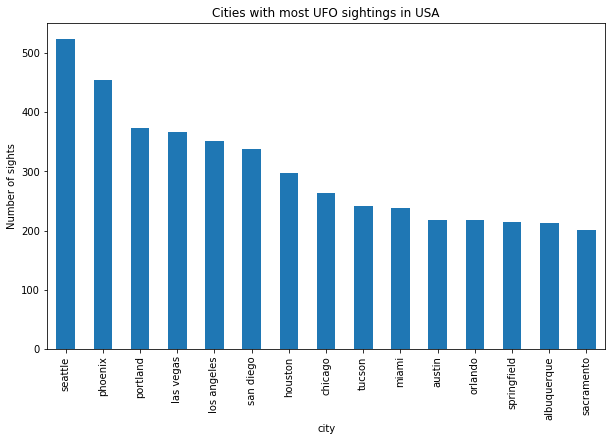

In [35]:
df_city_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('city') # add to x-label to the plot
plt.ylabel('Number of sights') # add y-label to the plot
plt.title('Cities with most UFO sightings in USA') # add title to the plot

plt.show()

In [36]:
cities=df.city.value_counts()
cities_plot=cities[cities>200]
cities_plot

seattle        525
phoenix        454
portland       374
las vegas      368
los angeles    353
san diego      338
houston        297
chicago        265
tucson         241
miami          239
orlando        220
austin         218
springfield    214
albuquerque    213
sacramento     201
Name: city, dtype: int64

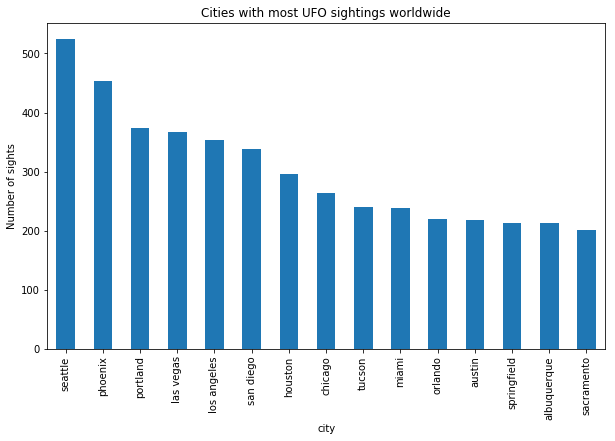

In [37]:
cities_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('city') # add to x-label to the plot
plt.ylabel('Number of sights') # add y-label to the plot
plt.title('Cities with most UFO sightings worldwide') # add title to the plot

plt.show()

In [38]:
df.drop('index', axis=1, inplace=True)

In [39]:
df.head()

,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,None,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),None,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


Now, let's see what time you are most likely to see a UFO

In [40]:
new = df["datetime"].str.split(" ", n = 1, expand = True) 

In [41]:
df['hour']=new[1]

In [42]:
df.head()

,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude,hour
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,20:30
1,10/10/1949 21:00,lackland afb,tx,None,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,21:00
2,10/10/1955 17:00,chester (uk/england),None,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,17:00
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,21:00
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,20:00


In [54]:
df_hours=df['hour'].value_counts()
df_hours.head(10)
df_hours=df_hours[0:10]

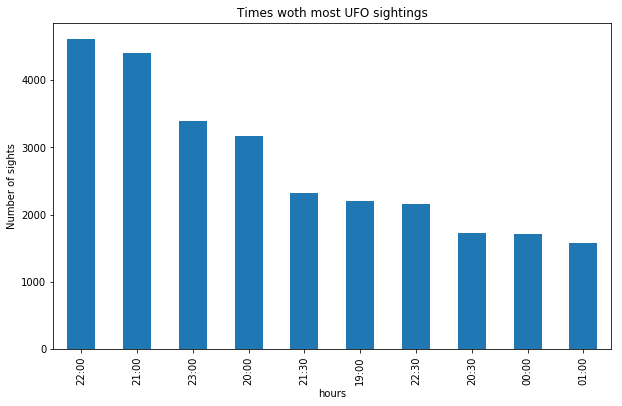

In [55]:
df_hours.plot(kind='bar', figsize=(10, 6))

plt.xlabel('hours') # add to x-label to the plot
plt.ylabel('Number of sights') # add y-label to the plot
plt.title('Times woth most UFO sightings') # add title to the plot

plt.show()

In [63]:
df_cities_hr=df[df.hour=='22:00']

In [64]:
df_hr_cities=df_cities_hr.city.value_counts()
df_cities_hr_plot=df_hr_cities[0:10]
df_hr_cities.head(10)

seattle         29
san diego       23
myrtle beach    22
phoenix         18
portland        16
springfield     16
houston         16
auburn          15
los angeles     15
chicago         15
Name: city, dtype: int64

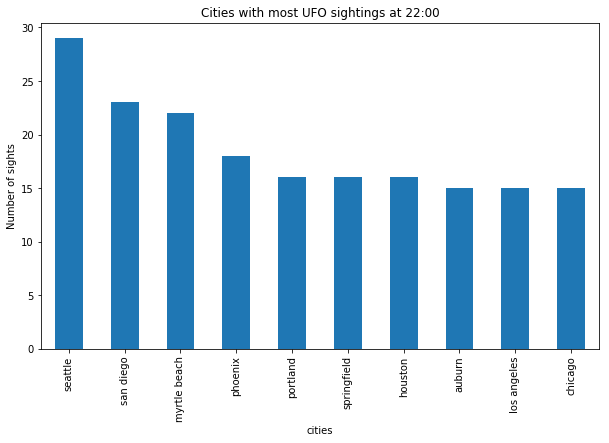

In [59]:
df_cities_hr_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('cities') # add to x-label to the plot
plt.ylabel('Number of sights') # add y-label to the plot
plt.title('Cities with most UFO sightings at 22:00') # add title to the plot

plt.show()

In [46]:
seattle=df[df['city']=="seattle"]
seattle.head()

,datetime,city,state,country,shape,duration__seconds_,duration__hours_min_,comments,date_posted,latitude,longitude,hour
113,10/10/2002 06:00,seattle,wa,us,sphere,90.0,90 seconds,Light falls from sky,2002-10-15,47.606389,-122.330833,06:00
143,10/10/2005 07:40,seattle,wa,us,other,60.0,one + minutes,round symetrical with roundish flat bottom shi...,2005-10-11,47.606389,-122.330833,07:40
197,10/10/2008 20:00,seattle,wa,us,light,180.0,3 minutes,Around 8:00 pm? I Went out side and looked up ...,2008-10-31,47.606389,-122.330833,20:00
393,10/11/2007 19:50,seattle,wa,us,triangle,10.0,10 seconds,I saw two orange colored lights&#44 close toge...,2007-11-28,47.606389,-122.330833,19:50
685,10/1/2001 01:05,seattle,wa,us,None,1.0,1 sec,just a meteor sighting...,2001-10-12,47.606389,-122.330833,01:05


In [47]:
seattle.hour.value_counts()

22:00    29
21:00    20
23:00    18
22:30    16
21:30    15
20:00    13
15:00     9
17:30     9
18:00     8
02:00     8
23:15     8
20:30     7
19:00     7
22:45     6
17:00     6
00:00     6
23:30     6
02:30     5
22:15     5
03:30     5
20:45     5
19:15     5
01:00     5
22:10     5
16:30     4
04:00     4
18:45     4
19:30     4
22:50     4
20:15     4
         ..
17:18     1
20:07     1
13:45     1
21:27     1
00:15     1
22:17     1
22:05     1
23:59     1
22:01     1
20:34     1
18:46     1
20:13     1
19:37     1
16:15     1
01:28     1
23:52     1
12:40     1
01:08     1
05:45     1
20:25     1
08:15     1
21:10     1
15:15     1
06:59     1
12:15     1
09:50     1
22:44     1
17:40     1
15:31     1
11:15     1
Name: hour, Length: 220, dtype: int64